In [156]:
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(zoo)
# Load necessary libraries for plotting
library(ggplot2)
library(viridis)

options(repr.plot.width = 18, repr.plot.height = 9)


In [157]:
curr_dir <- getwd()
base_dir <- dirname(curr_dir)


base_dir

[1] "/home/ibrazug/Dokumente/KindersegV2/Ibra"

No id variables; using all as measure variables



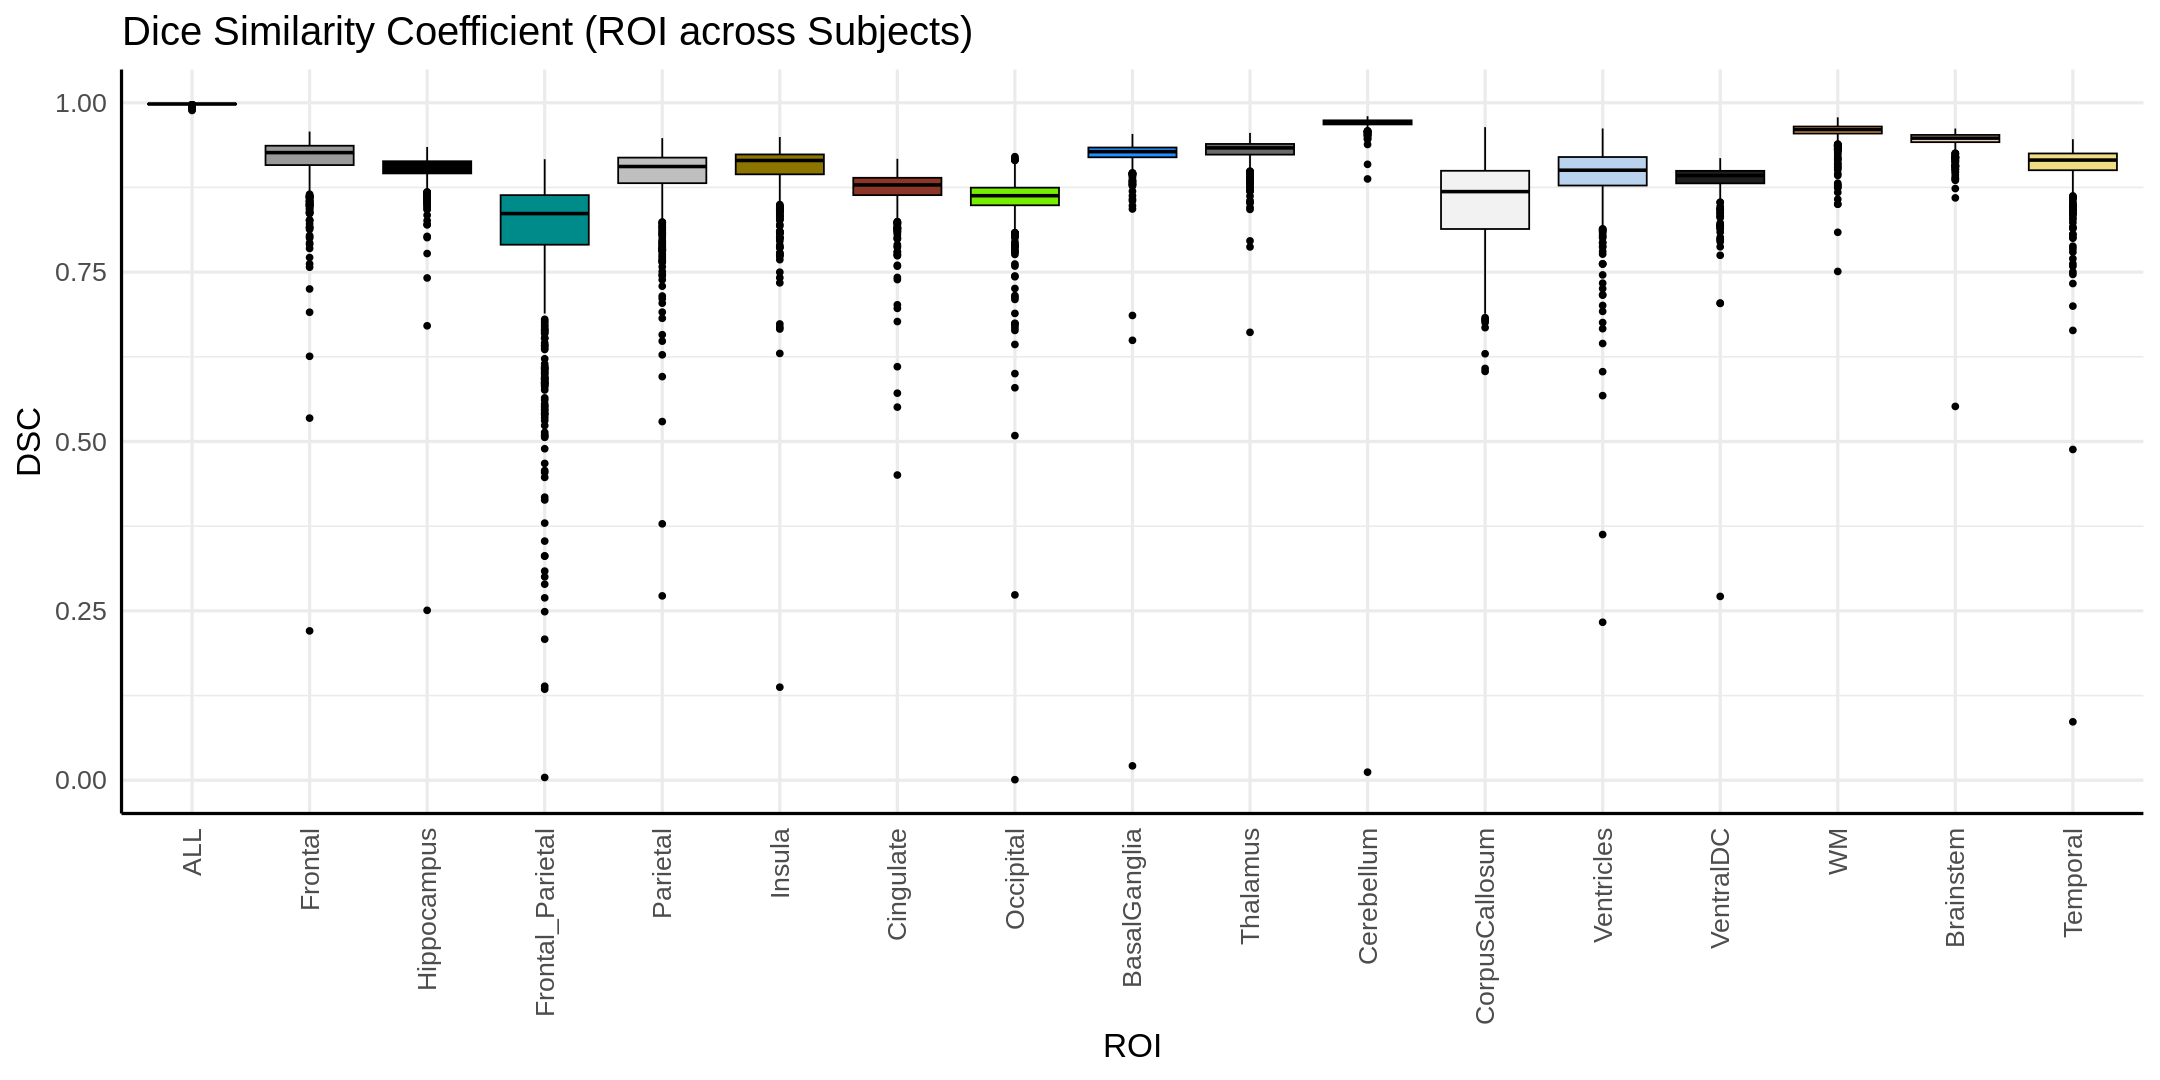

In [158]:
# Load the DICE data from a CSV file
dice <- read.csv(file.path(base_dir, "code", "DICE.csv"))

# Replace commas with dots in the entire DataFrame
dice <- as.data.frame(lapply(dice, function(x) gsub(",", ".", x)))

# Convert all columns to numeric except 'subject'
numeric_columns <- setdiff(names(dice), 'subject')
dice[, numeric_columns] <- lapply(dice[, numeric_columns], as.numeric)

# Read the QC data from a CSV file
qc <- read.csv(file.path(base_dir, "derivatives", "QC_SC_RESULT.csv"))

# Filter rows in qc where qc_inclusion is "yes"
qc <- qc[qc$qc_inclusion == "yes", ]

# Filter rows in dice where the subject is in qc with qc_inclusion "yes"
#dice <- dice[dice$subject %in% qc$subject, ]

# Select specific columns from the DICE DataFrame
selected_columns <- c('ALL', 'Frontal', 'Hippocampus', 'Frontal_Parietal',
                      'Parietal', 'Insula', 'Cingulate', 'Occipital', 'BasalGanglia',
                      'Thalamus', 'Cerebellum', 'CorpusCallosum', 'Ventricles', 'VentralDC',
                      'WM', 'Brainstem', 'Temporal')
df <- dice[selected_columns]

# Reshape the DataFrame using melt function
df_melted <- reshape2::melt(df)

# Rename columns in the melted DataFrame
colnames(df_melted) <- c('ROI', 'DSC')


# Set a random color palette
set.seed(42)  # Set a seed for reproducibility
random_colors <- sample(colors(), length(unique(df_melted$ROI)))

# Create a boxplot with random colors
g <- ggplot(df_melted, aes(x = ROI, y = DSC, fill = ROI)) +
  geom_boxplot(color = "black", show.legend = FALSE) +
  scale_fill_manual(values = setNames(random_colors, unique(df_melted$ROI))) +
  labs(title = 'Dice Similarity Coefficient (ROI across Subjects)',
       x = 'ROI', y = 'DSC') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))

# Display the colorful boxplot
print(g)


In [159]:
#ggsave("/home/ibrazug/Dokumente/KindersegV2/Figs/plot.jpeg", plot = last_plot(), width = 18, height = 9, dpi = 300)

No id variables; using all as measure variables



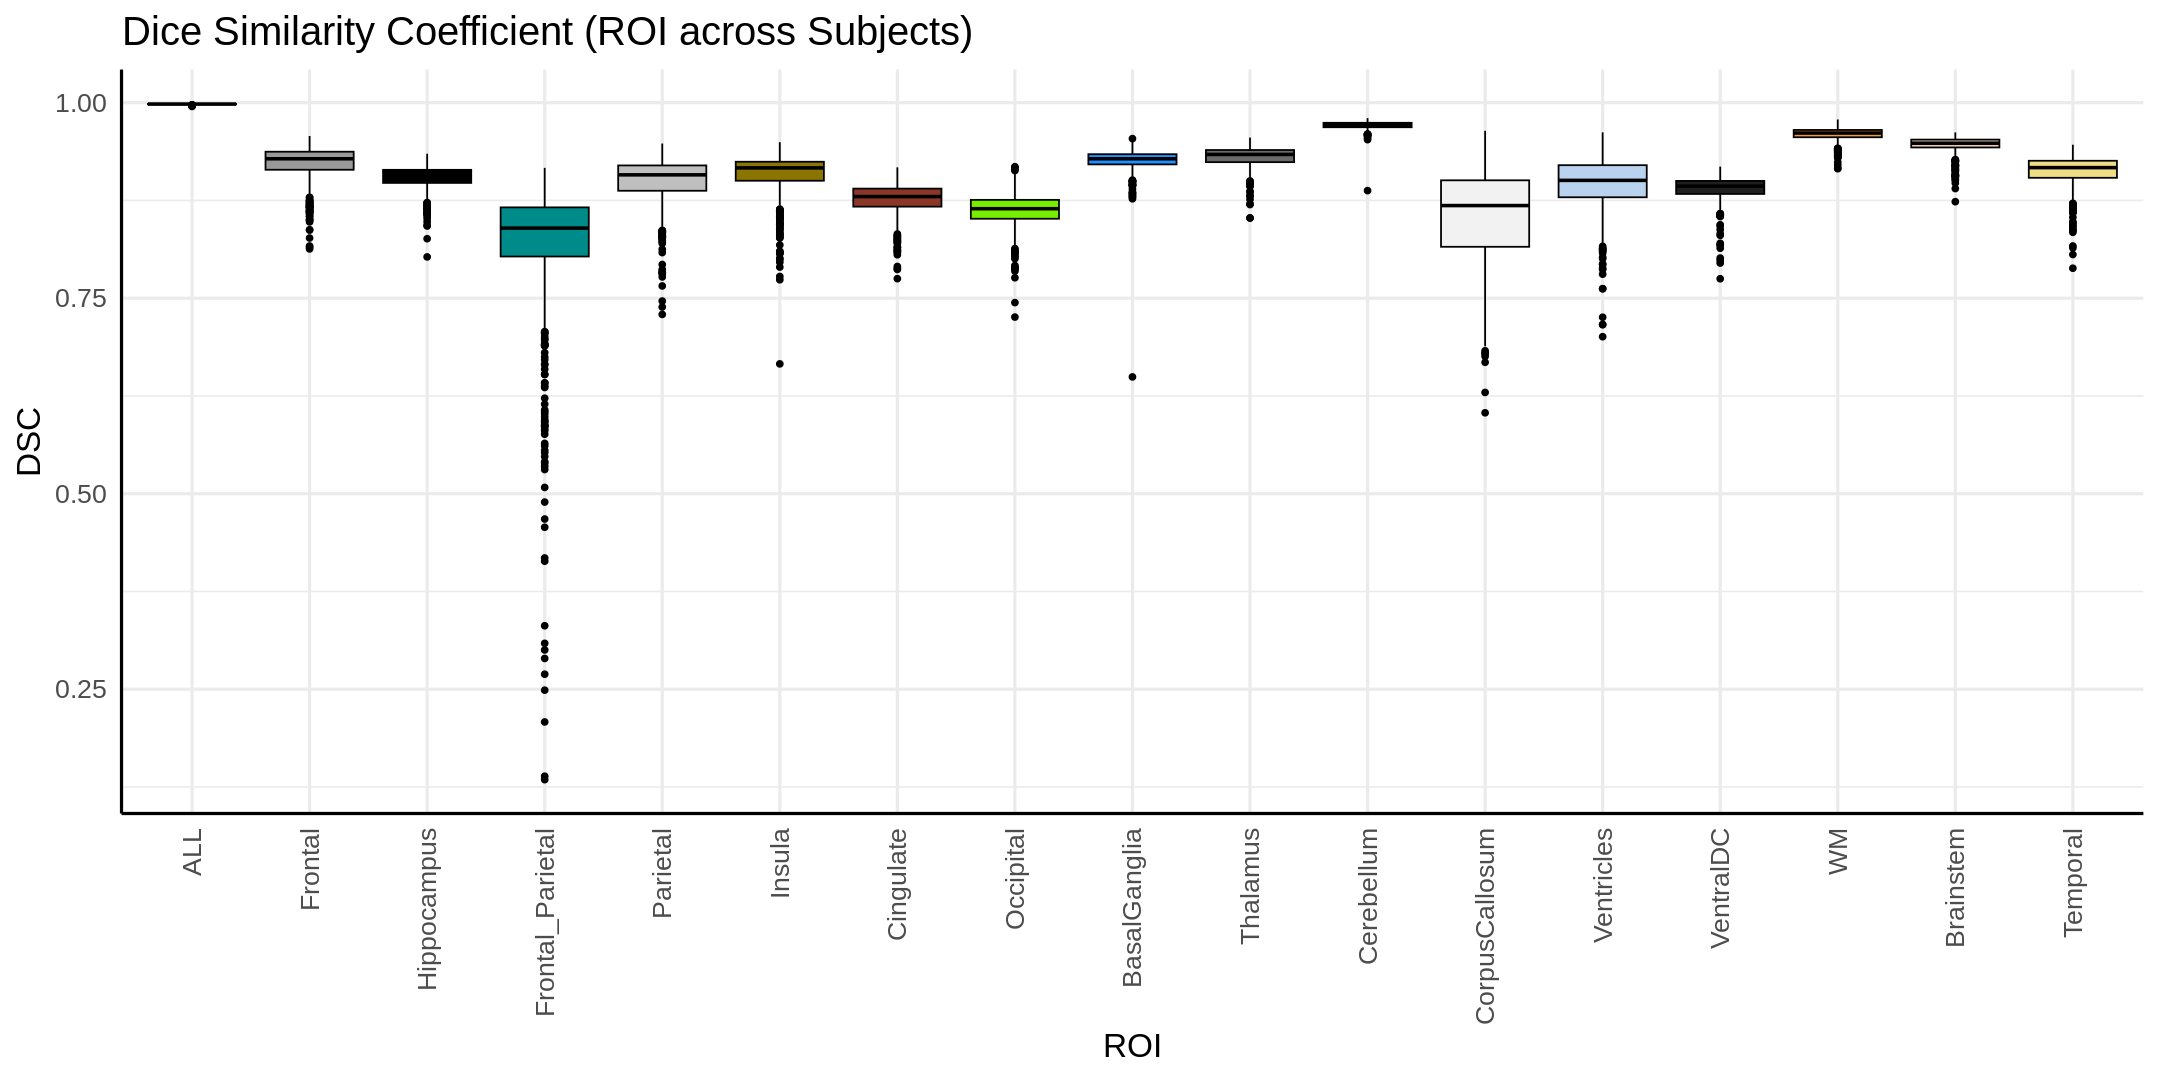

In [160]:
# Load the DICE data from a CSV file
dice <- read.csv(file.path(base_dir, "code", "DICE.csv"))

# Replace commas with dots in the entire DataFrame
dice <- as.data.frame(lapply(dice, function(x) gsub(",", ".", x)))

# Convert all columns to numeric except 'subject'
numeric_columns <- setdiff(names(dice), 'subject')
dice[, numeric_columns] <- lapply(dice[, numeric_columns], as.numeric)

# Read the QC data from a CSV file
qc <- read.csv(file.path(base_dir, "derivatives", "QC_SC_RESULT.csv"))

# Filter rows in qc where qc_inclusion is "yes"
qc <- qc[qc$qc_inclusion == "yes", ]

# Filter rows in dice where the subject is in qc with qc_inclusion "yes"
dice <- dice[dice$subject %in% qc$subject, ]

# Select specific columns from the DICE DataFrame
selected_columns <- c('ALL', 'Frontal', 'Hippocampus', 'Frontal_Parietal',
                      'Parietal', 'Insula', 'Cingulate', 'Occipital', 'BasalGanglia',
                      'Thalamus', 'Cerebellum', 'CorpusCallosum', 'Ventricles', 'VentralDC',
                      'WM', 'Brainstem', 'Temporal')
df <- dice[selected_columns]

# Reshape the DataFrame using melt function
df_melted <- reshape2::melt(df)

# Rename columns in the melted DataFrame
colnames(df_melted) <- c('ROI', 'DSC')


# Set a random color palette
set.seed(42)  # Set a seed for reproducibility
random_colors <- sample(colors(), length(unique(df_melted$ROI)))

# Create a boxplot with random colors
g <- ggplot(df_melted, aes(x = ROI, y = DSC, fill = ROI)) +
  geom_boxplot(color = "black", show.legend = FALSE) +
  scale_fill_manual(values = setNames(random_colors, unique(df_melted$ROI))) +
  labs(title = 'Dice Similarity Coefficient (ROI across Subjects)',
       x = 'ROI', y = 'DSC') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))

# Display the colorful boxplot
print(g)


In [161]:
#ggsave("/home/ibrazug/Dokumente/KindersegV2/Graphs/plot.jpeg", plot = last_plot(), width = 18, height = 9, dpi = 300)

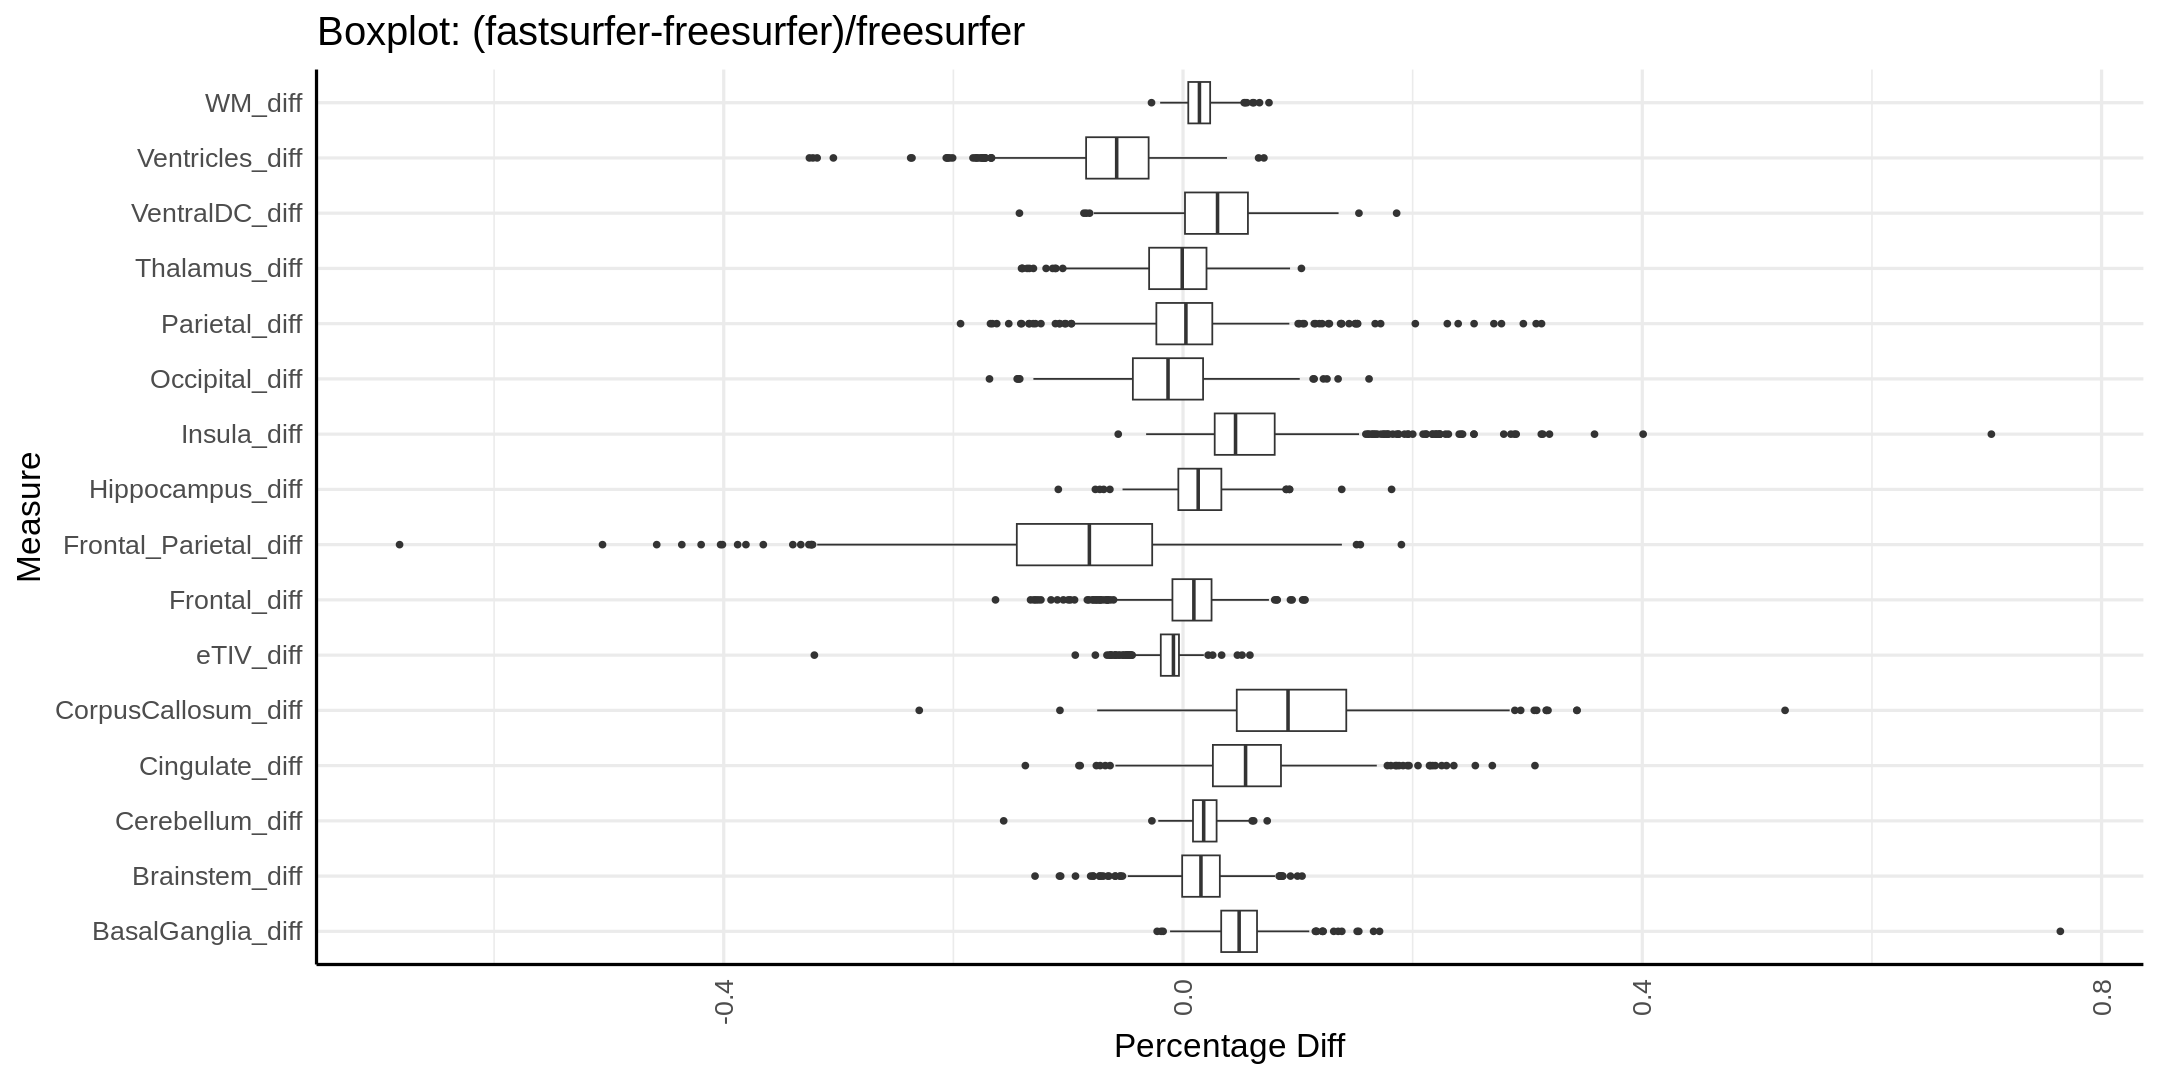

In [162]:

# Read QC, fastsurfer_vol, and freesurfer_vol data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")
fastsurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FASTSURFER_SEG/fastsurfer_vol.csv"))
freesurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FREESURFER_SEG/freesurfer_vol.csv"))

# Merge dataframes
merged_df <- merge(fastsurfer_vol, freesurfer_vol, by = 'IDs', suffixes = c('_fastsurfer', '_freesurfer'))

# Select relevant columns
relevant_cols <- colnames(fastsurfer_vol)[3:18]

# Initialize result dataframe
result_df <- data.frame(IDs = merged_df$IDs)

# Calculate percentage difference and store in result_df
for (col in relevant_cols) {
  result_df[paste0(col, "_diff")] <- ((merged_df[paste0(col, "_fastsurfer")] - merged_df[paste0(col, "_freesurfer")]) / merged_df[paste0(col, "_freesurfer")])
}

# Filter result_df based on QC inclusion
yes <- qc$subject[qc$qc_inclusion == "yes"]
result_df <- result_df[result_df$IDs %in% yes, ]

# Create a boxplot using ggplot2
result_df_long <- pivot_longer(result_df, cols = contains("_diff"), names_to = "Measure", values_to = "Percentage_Diff")

# Set a stylish ggplot theme
theme_set(theme_minimal())

# Create the boxplot
ggplot(result_df_long, aes(x = Percentage_Diff, y = Measure)) +
  geom_boxplot() +

  labs(title = 'Boxplot: (fastsurfer-freesurfer)/freesurfer', x = 'Percentage Diff') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))


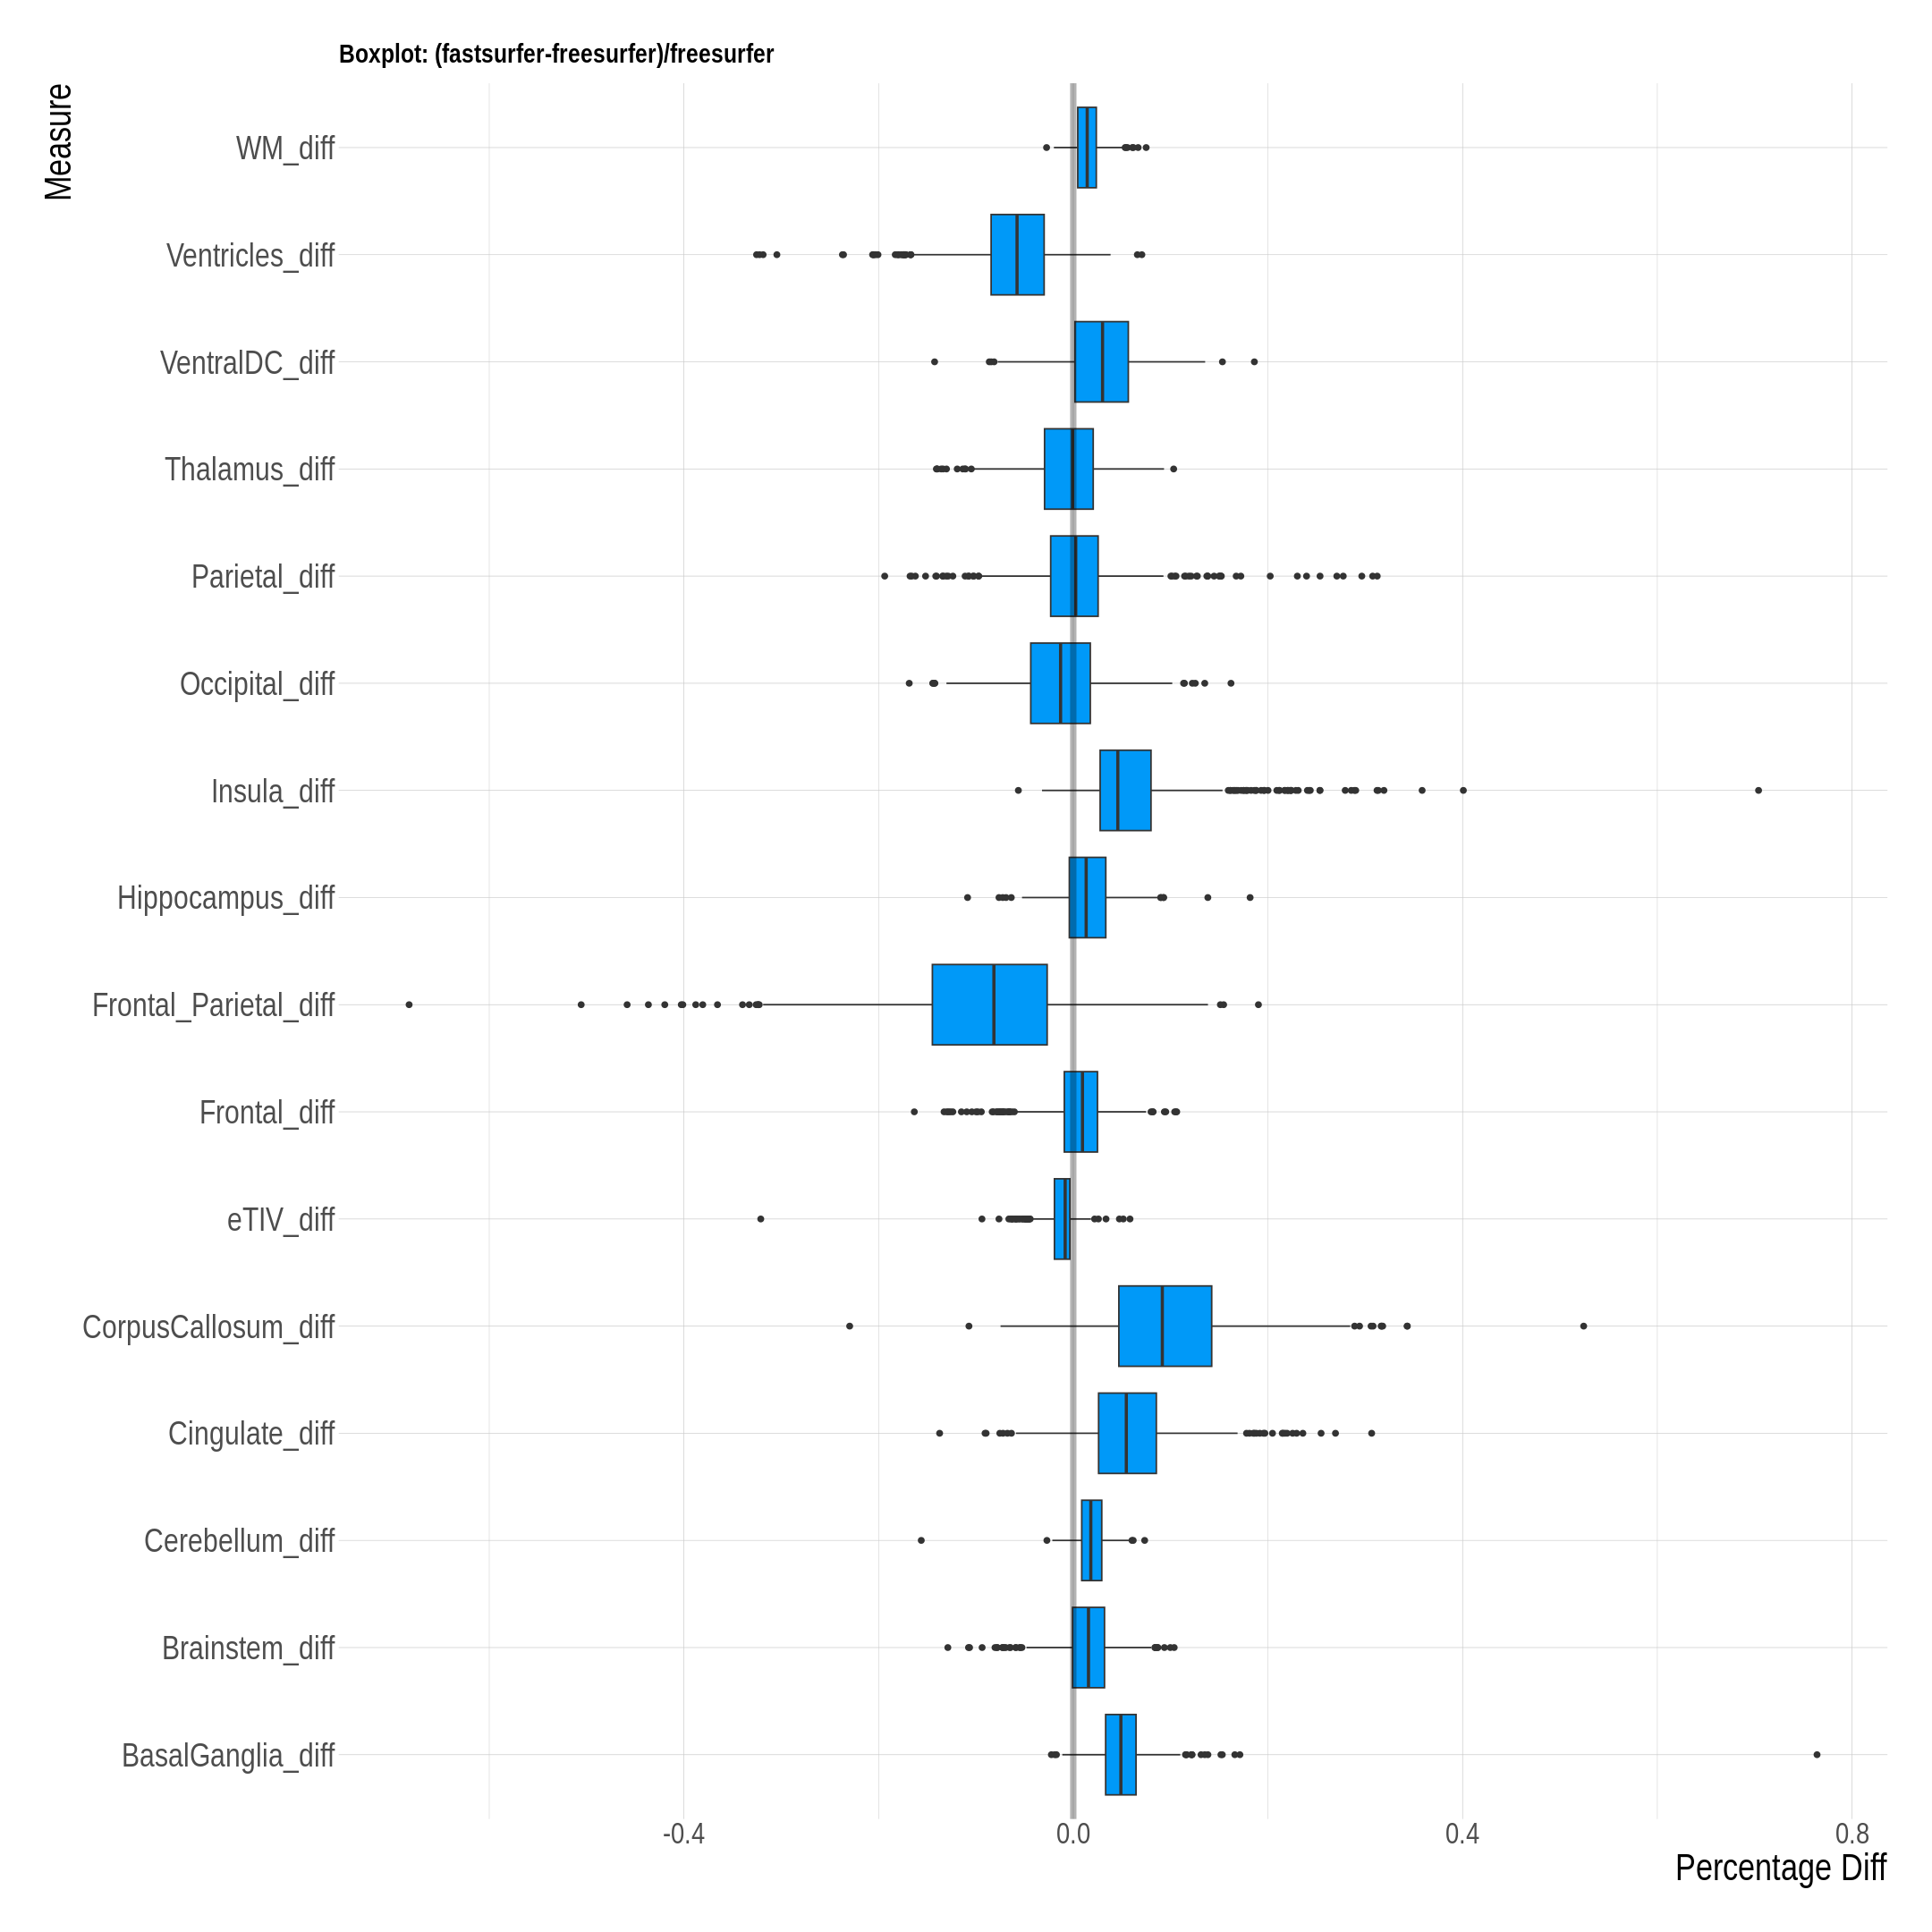

In [154]:

# Read QC, fastsurfer_vol, and freesurfer_vol data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")
fastsurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FASTSURFER_SEG/fastsurfer_vol.csv"))
freesurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FREESURFER_SEG/freesurfer_vol.csv"))

# Merge dataframes
merged_df <- merge(fastsurfer_vol, freesurfer_vol, by = 'IDs', suffixes = c('_fastsurfer', '_freesurfer'))

# Select relevant columns
relevant_cols <- colnames(fastsurfer_vol)[3:18]

# Initialize result dataframe
result_df <- data.frame(IDs = merged_df$IDs)

# Calculate percentage difference and store in result_df
for (col in relevant_cols) {
  result_df[paste0(col, "_diff")] <- ((merged_df[paste0(col, "_fastsurfer")] - merged_df[paste0(col, "_freesurfer")]) / merged_df[paste0(col, "_freesurfer")])
}

# Filter result_df based on QC inclusion
yes <- qc$subject[qc$qc_inclusion == "yes"]
result_df <- result_df[result_df$IDs %in% yes, ]

# Create a boxplot using ggplot2
result_df_long <- pivot_longer(result_df, cols = contains("_diff"), names_to = "Measure", values_to = "Percentage_Diff")


# Create the boxplot
ggplot(result_df_long, aes(x = Percentage_Diff, y = Measure)) +
  geom_boxplot(fill = "#0099f8") +
  labs(title = 'Boxplot: (fastsurfer-freesurfer)/freesurfer', x = 'Percentage Diff') +
    theme_ipsum()+
    scale_color_viridis_d(option='turbo')+
    theme(axis.title.x=element_text(size=25),
    axis.title.y=element_text(size=25),
    strip.text = element_text(size = 22),
    axis.text.x = element_text(size=20),#, angle=90,hjust=0.95,vjust=0.2),
    axis.text.y = element_text(size=22),
    legend.title = element_text(size=22),
    legend.text = element_text(size=22),
          
     )+
  geom_vline(xintercept = 0, color = "black", size = 2, alpha = 0.3)


In [155]:
ggsave("/home/ibrazug/Dokumente/KindersegV2/Graphs/plot.jpeg", plot = last_plot(), width = 18, height = 9, dpi = 300)

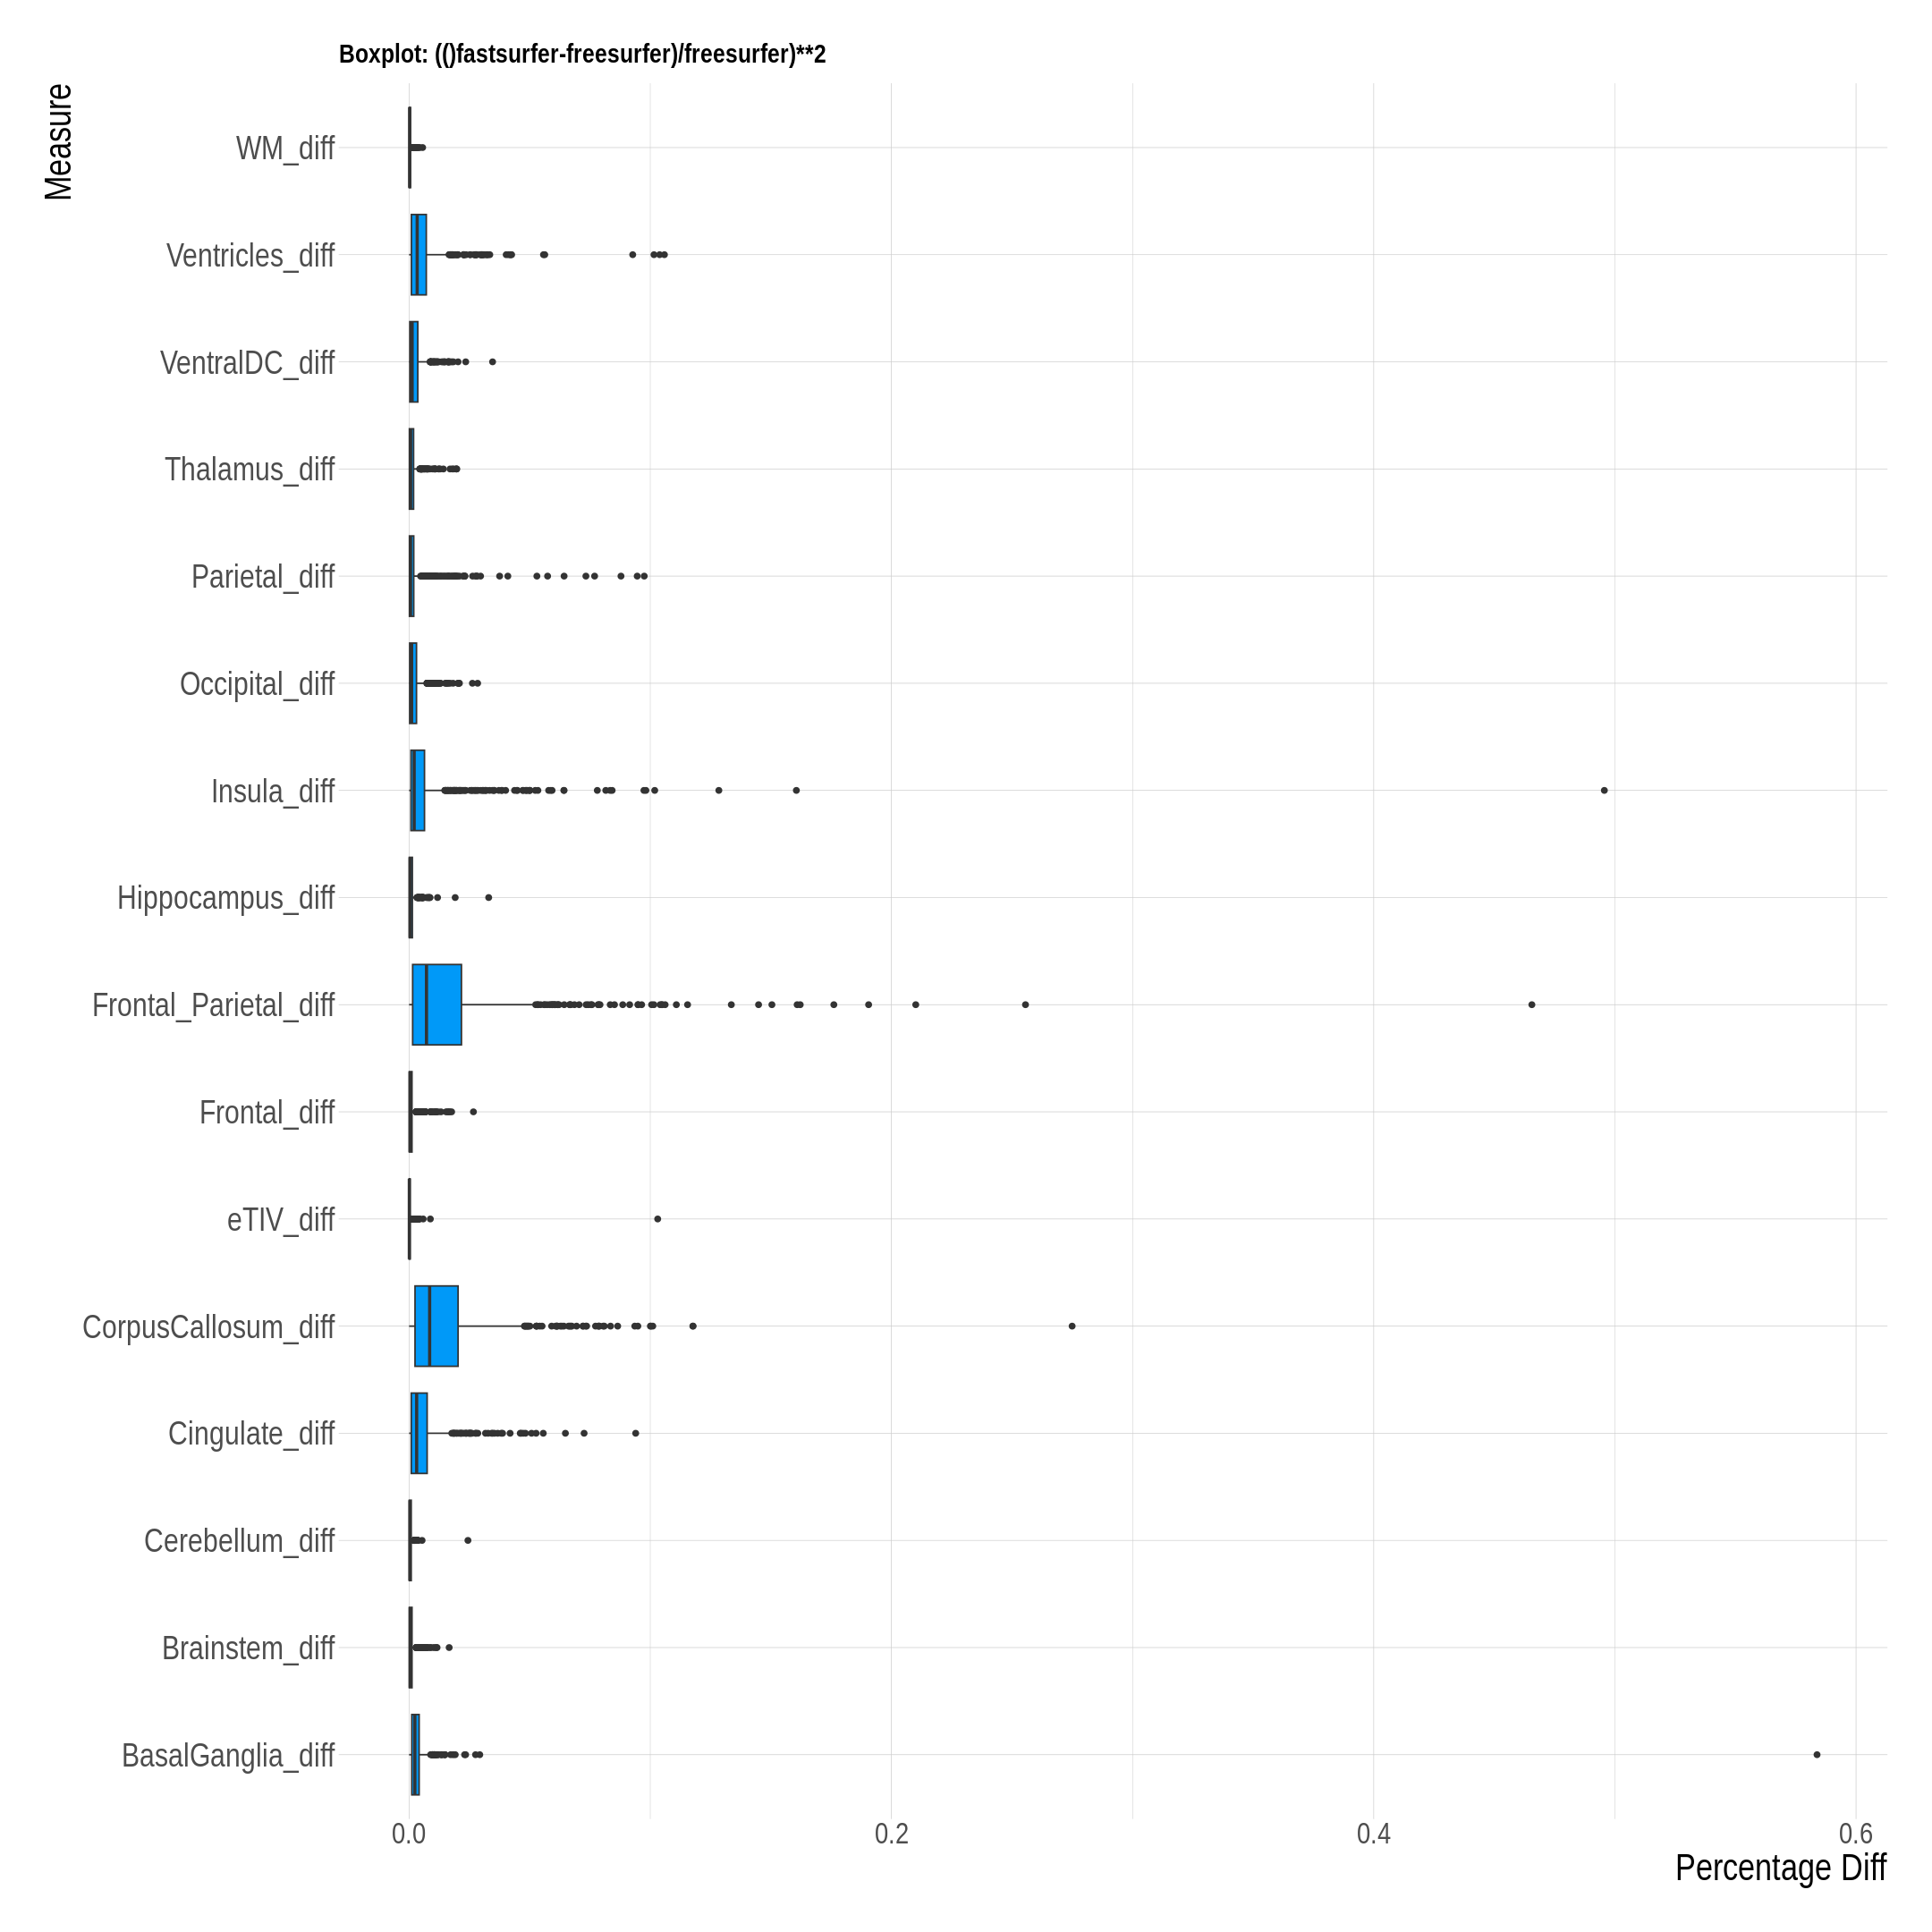

In [152]:

# Read QC, fastsurfer_vol, and freesurfer_vol data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")
fastsurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FASTSURFER_SEG/fastsurfer_vol.csv"))
freesurfer_vol <- read.csv(paste0(base_dir, "/derivatives/FREESURFER_SEG/freesurfer_vol.csv"))

# Merge dataframes
merged_df <- merge(fastsurfer_vol, freesurfer_vol, by = 'IDs', suffixes = c('_fastsurfer', '_freesurfer'))

# Select relevant columns
relevant_cols <- colnames(fastsurfer_vol)[3:18]

# Initialize result dataframe
result_df <- data.frame(IDs = merged_df$IDs)

# Calculate percentage difference and store in result_df
for (col in relevant_cols) {
  result_df[paste0(col, "_diff")] <- ((merged_df[paste0(col, "_fastsurfer")] - merged_df[paste0(col, "_freesurfer")]) / merged_df[paste0(col, "_freesurfer")])**2
}

# Filter result_df based on QC inclusion
yes <- qc$subject[qc$qc_inclusion == "yes"]
result_df <- result_df[result_df$IDs %in% yes, ]

# Create a boxplot using ggplot2
result_df_long <- pivot_longer(result_df, cols = contains("_diff"), names_to = "Measure", values_to = "Percentage_Diff")


# Create the boxplot
ggplot(result_df_long, aes(x = Percentage_Diff, y = Measure)) +
  geom_boxplot(fill = "#0099f8") +
  labs(title = 'Boxplot: (()fastsurfer-freesurfer)/freesurfer)**2', x = 'Percentage Diff') +
    theme_ipsum()+
    scale_color_viridis_d(option='turbo')+
    theme(axis.title.x=element_text(size=25),
    axis.title.y=element_text(size=25),
    strip.text = element_text(size = 22),
    axis.text.x = element_text(size=20),#, angle=90,hjust=0.95,vjust=0.2),
    axis.text.y = element_text(size=22),
    legend.title = element_text(size=22),
    legend.text = element_text(size=22),
          
     )


length before:  671 
length after:  654 


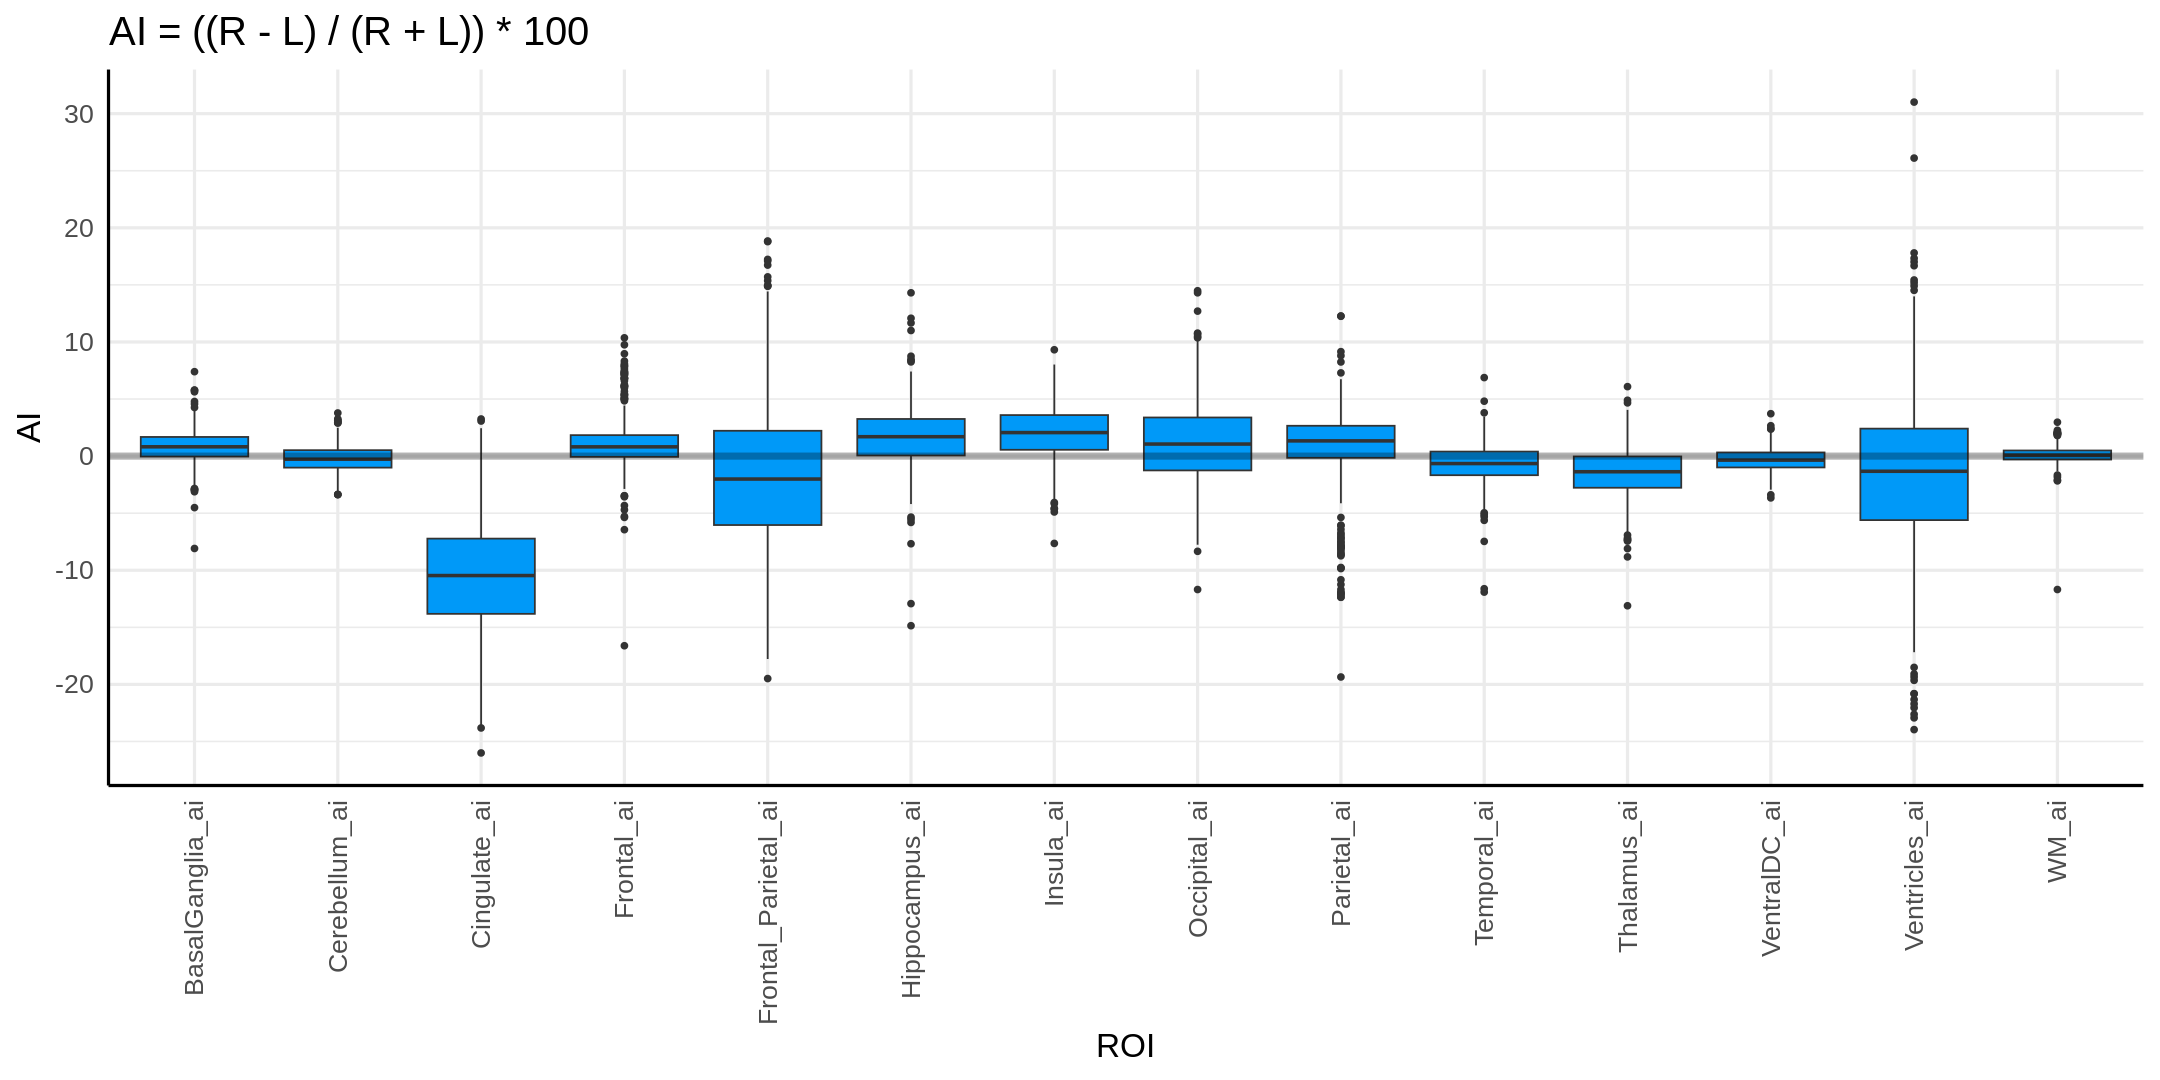

In [182]:

# Read data
left <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/free/merged_table_sumROIs_left.csv")
right <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/free/merged_table_sumROIs_right.csv")

# Drop 'Unnamed: 0' column
left <- left[, !(names(left) %in% c("Unnamed: 0"))]
right <- right[, !(names(right) %in% c("Unnamed: 0"))]

# Merge data frames on 'IDs'
df <- merge(right, left, by='IDs', suffixes=c('_right', '_left'))

# Select columns of interest
cols <- c('Frontal', 'Temporal', 'Hippocampus', 'Frontal_Parietal',
          'Parietal', 'Insula', 'Cingulate', 'Occipital', 'BasalGanglia',
          'Thalamus', 'Cerebellum', 'Ventricles', 'VentralDC', 'WM')

# Create an empty data frame for results
result_df <- data.frame(IDs = df$IDs)

# Calculate AI for each specified column
for (col in cols) {
  R <- df[[paste(col, "_right", sep = "")]]
  L <- df[[paste(col, "_left", sep = "")]]
  result_df[[paste(col, "_ai", sep = "")]] <- ((R - L) / (R + L)) * 100
}



cat("length before: ", nrow(result_df), "\n")


# Read QC data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")

# Filter IDs based on QC inclusion
good <- qc %>%
  filter(qc_inclusion == "yes") %>%
  pull(subject) %>%
  paste(".reconall", sep = "")

result_df <- result_df %>%
  filter(IDs %in% good)

cat("length after: ", nrow(result_df), "\n")

# Reshape data for plotting
df_melted <- result_df %>%
  select(-IDs) %>%
  gather(key = "ROI", value = "AI")

# Plot boxplot
g <- ggplot(df_melted, aes(x = ROI, y = AI)) +
  geom_boxplot(fill = "#0099f8") +
  ggtitle("AI across Subjects") +
  theme_minimal() +
  geom_hline(yintercept = 0, color = "black", size = 2, alpha = 0.3)+

  labs(title = 'AI = ((R - L) / (R + L)) * 100',
       x = 'ROI', y = 'AI') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))

print(g)


In [226]:
#ggsave("/home/ibrazug/Dokumente/KindersegV2/Fig/plot.jpeg", plot = last_plot(), width = 18, height = 9, dpi = 300)

length before:  671 
length after:  654 


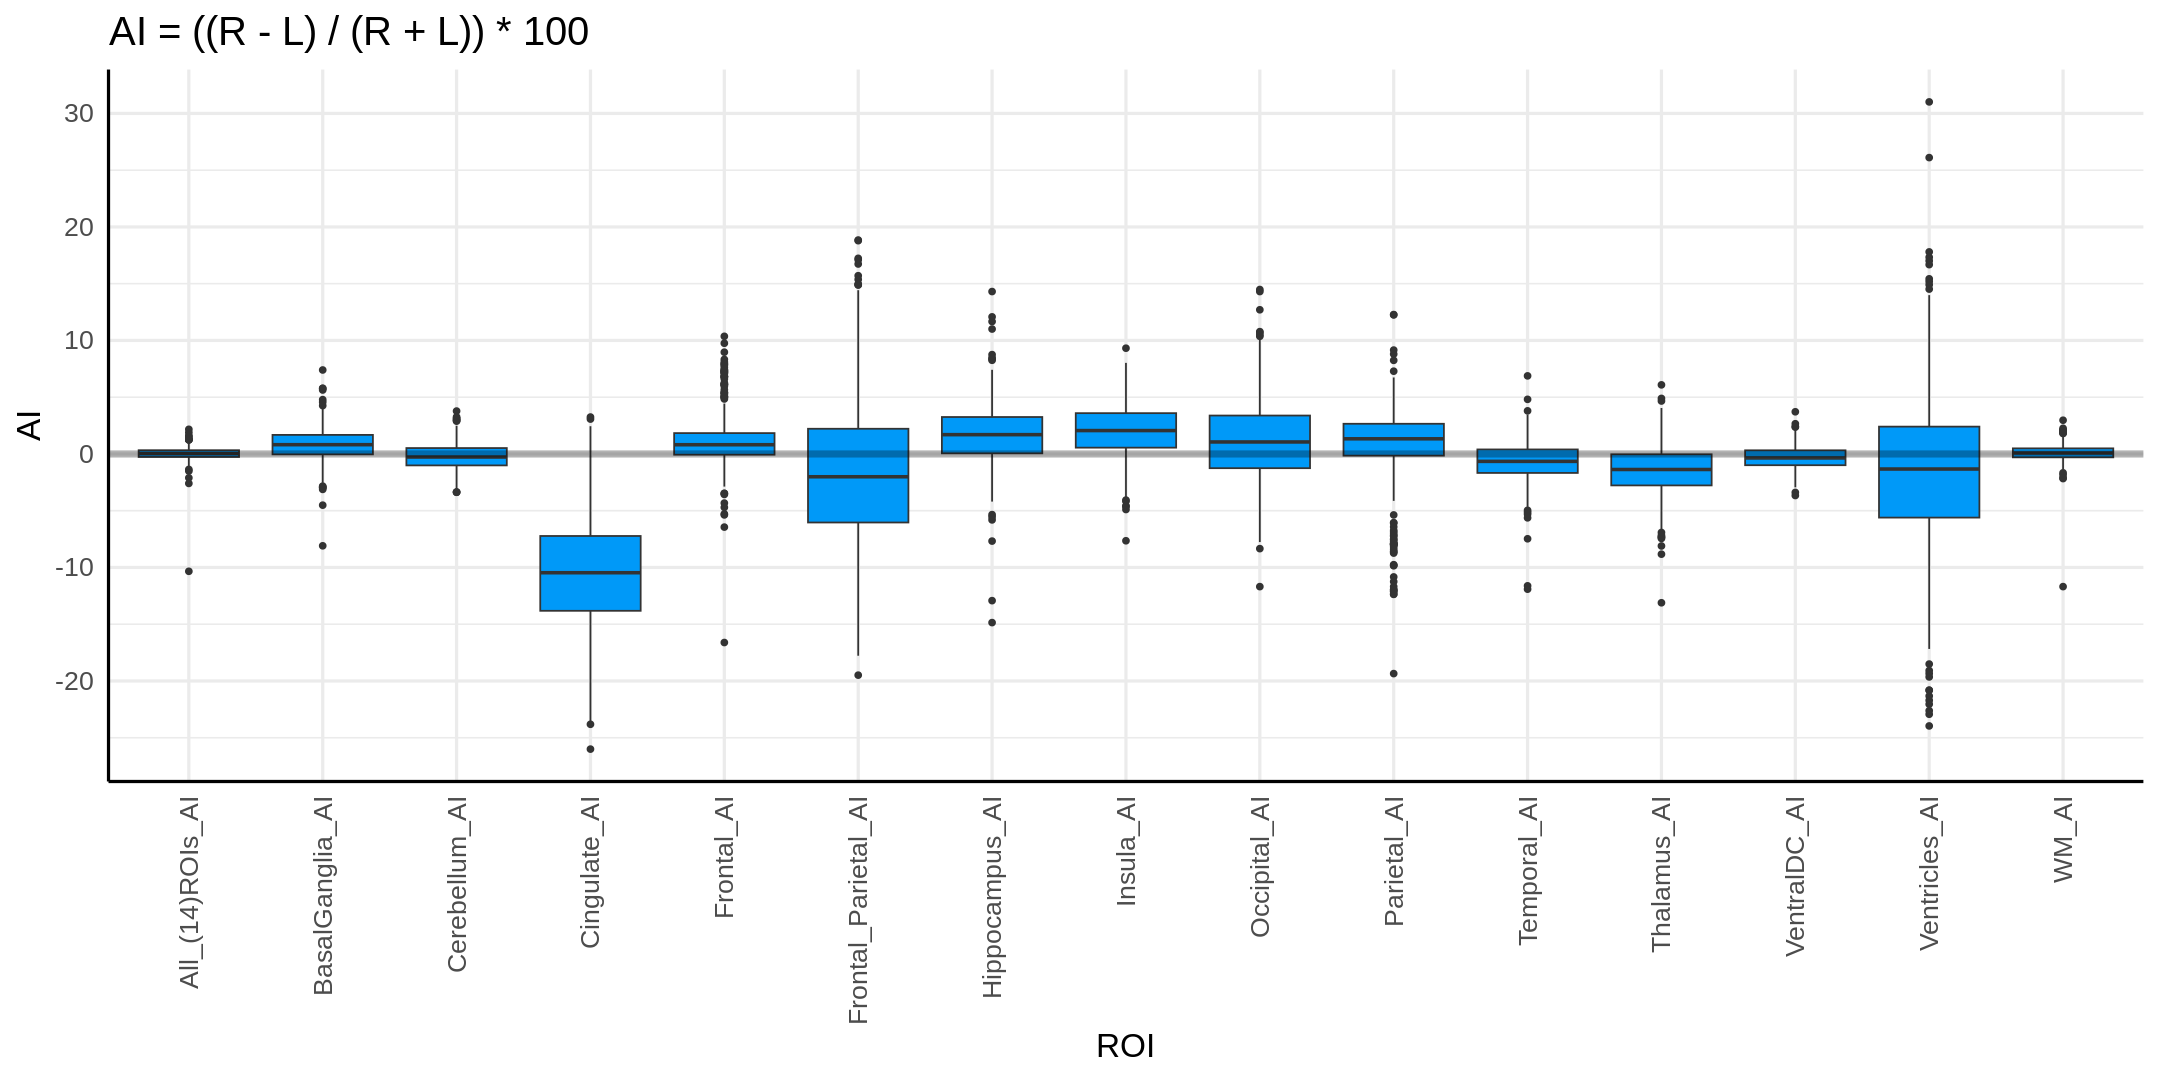

In [224]:

# Read data
left <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/free/merged_table_sumROIs_left.csv")
right <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/free/merged_table_sumROIs_right.csv")

# Drop 'Unnamed: 0' column
left <- left[, !(names(left) %in% c("Unnamed: 0"))]
right <- right[, !(names(right) %in% c("Unnamed: 0"))]

# Merge data frames on 'IDs'
df <- merge(right, left, by='IDs', suffixes=c('_right', '_left'))

# Select columns of interest
cols <- c('Frontal', 'Temporal', 'Hippocampus', 'Frontal_Parietal',
          'Parietal', 'Insula', 'Cingulate', 'Occipital', 'BasalGanglia',
          'Thalamus', 'Cerebellum', 'Ventricles', 'VentralDC', 'WM')


# calculate the sumvol of all rois
cols_right <- paste(cols, "_right", sep = "")
cols_left <- paste(cols, "_left", sep = "")
df$sum_right <- rowSums(df[, cols_right])
df$sum_left <- rowSums(df[, cols_left])




# Create an empty data frame for results
result_df <- data.frame(IDs = df$IDs)

# Calculate AI for each specified column
for (col in cols) {
  R <- df[[paste(col, "_right", sep = "")]]
  L <- df[[paste(col, "_left", sep = "")]]
  result_df[[paste(col, "_AI", sep = "")]] <- ((R - L) / (R + L)) * 100
}


result_df[[paste("All_(14)ROIs", "_AI", sep = "")]] <- ((df$sum_right - df$sum_left) / (df$sum_right + df$sum_left)) * 100

cat("length before: ", nrow(result_df), "\n")


# Read QC data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")

# Filter IDs based on QC inclusion
good <- qc %>%
  filter(qc_inclusion == "yes") %>%
  pull(subject) %>%
  paste(".reconall", sep = "")

result_df <- result_df %>%
  filter(IDs %in% good)

cat("length after: ", nrow(result_df), "\n")

# Reshape data for plotting
df_melted <- result_df %>%
  select(-IDs) %>%
  gather(key = "ROI", value = "AI")

# Plot boxplot
g <- ggplot(df_melted, aes(x = ROI, y = AI)) +
  geom_boxplot(fill = "#0099f8") +
  ggtitle("AI across Subjects") +
  theme_minimal() +
  geom_hline(yintercept = 0, color = "black", size = 2, alpha = 0.3)+

  labs(title = 'AI = ((R - L) / (R + L)) * 100',
       x = 'ROI', y = 'AI') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))

print(g)


In [225]:
cat("Al = ((R - L) / (R + L)) * 100\n")

# Calculate mean, median, and IQR for each ROI
mean_df <- apply(result_df[, -1, drop = FALSE], 2, mean)
median_df <- apply(result_df[, -1, drop = FALSE], 2, median)
q1_df <- apply(result_df[, -1, drop = FALSE], 2, function(x) quantile(x, 0.25))
q3_df <- apply(result_df[, -1, drop = FALSE], 2, function(x) quantile(x, 0.75))
iqr_df <- q3_df - q1_df

summary_df <- data.frame(
  ROI = names(median_df),
  Mean = round(mean_df, 2),
  Median = round(median_df, 2),
  Q1 = round(q1_df, 2),
  Q3 = round(q3_df, 2),
  IQR = round(iqr_df, 2)
)

# Display the DataFrame
summary_df


Al = ((R - L) / (R + L)) * 100


,ROI,Mean,Median,Q1,Q3,IQR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Frontal_AI,Frontal_AI,1.03,0.81,-0.06,1.84,1.90
Temporal_AI,Temporal_AI,-0.69,-0.65,-1.67,0.40,2.07
Hippocampus_AI,Hippocampus_AI,1.67,1.70,0.06,3.25,3.20
Frontal_Parietal_AI,Frontal_Parietal_AI,-1.68,-2.01,-6.04,2.22,8.26
Parietal_AI,Parietal_AI,0.92,1.33,-0.15,2.66,2.81
Insula_AI,Insula_AI,2.08,2.06,0.55,3.59,3.04
Cingulate_AI,Cingulate_AI,-10.45,-10.46,-13.82,-7.23,6.59
Occipital_AI,Occipital_AI,1.07,1.06,-1.25,3.38,4.64
BasalGanglia_AI,BasalGanglia_AI,0.82,0.82,-0.04,1.68,1.71


In [227]:
summary_df

,ROI,Mean,Median,Q1,Q3,IQR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Frontal_AI,Frontal_AI,1.03,0.81,-0.06,1.84,1.90
Temporal_AI,Temporal_AI,-0.69,-0.65,-1.67,0.40,2.07
Hippocampus_AI,Hippocampus_AI,1.67,1.70,0.06,3.25,3.20
Frontal_Parietal_AI,Frontal_Parietal_AI,-1.68,-2.01,-6.04,2.22,8.26
Parietal_AI,Parietal_AI,0.92,1.33,-0.15,2.66,2.81
Insula_AI,Insula_AI,2.08,2.06,0.55,3.59,3.04
Cingulate_AI,Cingulate_AI,-10.45,-10.46,-13.82,-7.23,6.59
Occipital_AI,Occipital_AI,1.07,1.06,-1.25,3.38,4.64
BasalGanglia_AI,BasalGanglia_AI,0.82,0.82,-0.04,1.68,1.71


In [228]:
# Export the DataFrame to a CSV file
write.csv(summary_df, "/home/ibrazug/Dokumente/KindersegV2/Ibra/code/summary_table_AI.csv", row.names = FALSE)


In [229]:
#fastsurfer


length before:  671 
length after:  654 


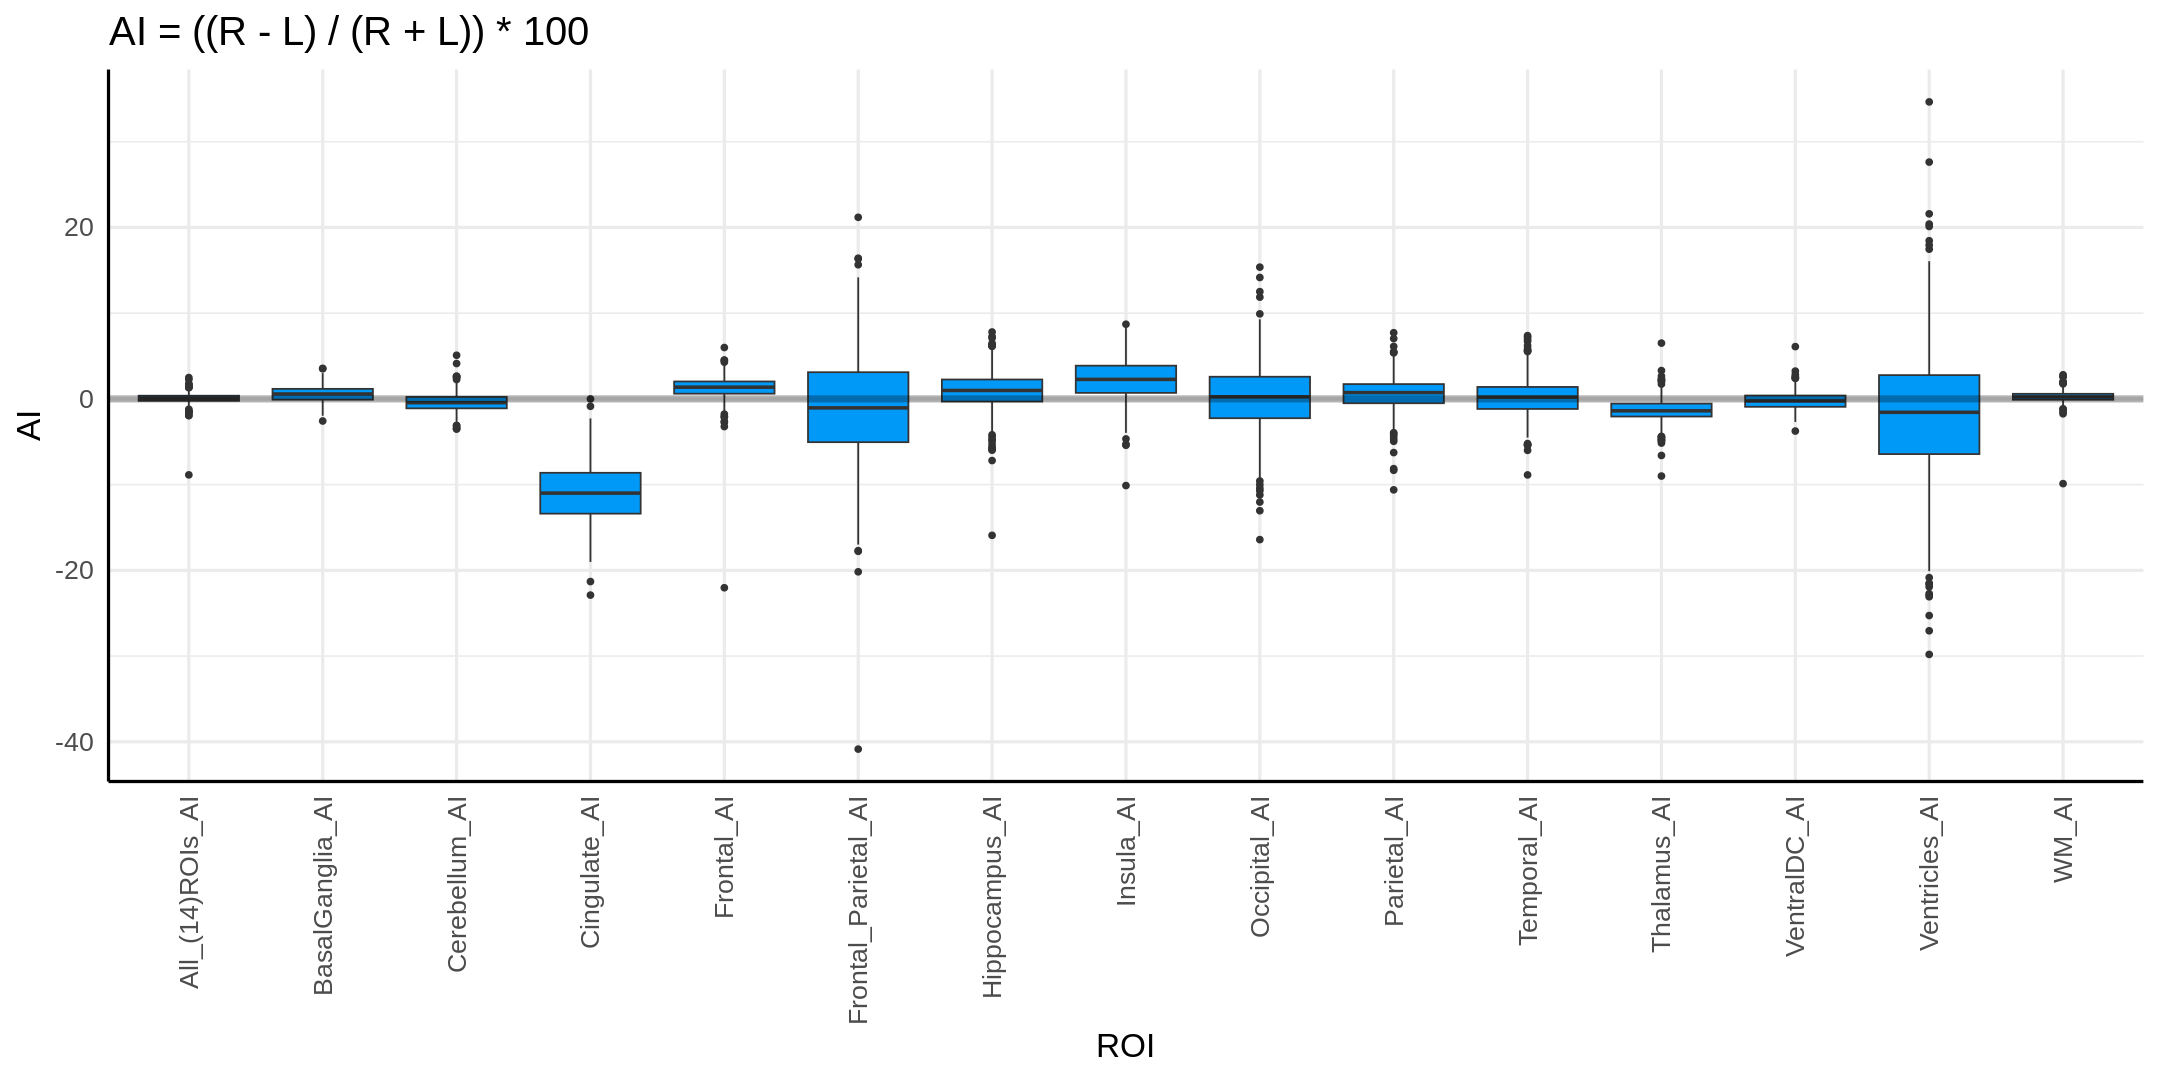

In [234]:

# Read data
left <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/fast/merged_table_sumROIs_left.csv")
right <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/code/vol_out_left_right/fast/merged_table_sumROIs_right.csv")

# Drop 'Unnamed: 0' column
left <- left[, !(names(left) %in% c("Unnamed: 0"))]
right <- right[, !(names(right) %in% c("Unnamed: 0"))]

# Merge data frames on 'IDs'
df <- merge(right, left, by='IDs', suffixes=c('_right', '_left'))

# Select columns of interest
cols <- c('Frontal', 'Temporal', 'Hippocampus', 'Frontal_Parietal',
          'Parietal', 'Insula', 'Cingulate', 'Occipital', 'BasalGanglia',
          'Thalamus', 'Cerebellum', 'Ventricles', 'VentralDC', 'WM')


# calculate the sumvol of all rois
cols_right <- paste(cols, "_right", sep = "")
cols_left <- paste(cols, "_left", sep = "")
df$sum_right <- rowSums(df[, cols_right])
df$sum_left <- rowSums(df[, cols_left])




# Create an empty data frame for results
result_df <- data.frame(IDs = df$IDs)

# Calculate AI for each specified column
for (col in cols) {
  R <- df[[paste(col, "_right", sep = "")]]
  L <- df[[paste(col, "_left", sep = "")]]
  result_df[[paste(col, "_AI", sep = "")]] <- ((R - L) / (R + L)) * 100
}


result_df[[paste("All_(14)ROIs", "_AI", sep = "")]] <- ((df$sum_right - df$sum_left) / (df$sum_right + df$sum_left)) * 100

cat("length before: ", nrow(result_df), "\n")


# Read QC data
qc <- read.csv("/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv")

# Filter IDs based on QC inclusion
good <- qc %>%
  filter(qc_inclusion == "yes") %>%
  pull(subject) 

result_df <- result_df %>%
  filter(IDs %in% good)

cat("length after: ", nrow(result_df), "\n")

# Reshape data for plotting
df_melted <- result_df %>%
  select(-IDs) %>%
  gather(key = "ROI", value = "AI")

# Plot boxplot
g <- ggplot(df_melted, aes(x = ROI, y = AI)) +
  geom_boxplot(fill = "#0099f8") +
  ggtitle("AI across Subjects") +
  theme_minimal() +
  geom_hline(yintercept = 0, color = "black", size = 2, alpha = 0.3)+

  labs(title = 'AI = ((R - L) / (R + L)) * 100',
       x = 'ROI', y = 'AI') +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color = 'black'))

print(g)


In [235]:
cat("Al = ((R - L) / (R + L)) * 100\n")

# Calculate mean, median, and IQR for each ROI
mean_df <- apply(result_df[, -1, drop = FALSE], 2, mean)
median_df <- apply(result_df[, -1, drop = FALSE], 2, median)
q1_df <- apply(result_df[, -1, drop = FALSE], 2, function(x) quantile(x, 0.25))
q3_df <- apply(result_df[, -1, drop = FALSE], 2, function(x) quantile(x, 0.75))
iqr_df <- q3_df - q1_df

summary_df <- data.frame(
  ROI = names(median_df),
  Mean = round(mean_df, 2),
  Median = round(median_df, 2),
  Q1 = round(q1_df, 2),
  Q3 = round(q3_df, 2),
  IQR = round(iqr_df, 2)
)

# Display the DataFrame
summary_df


Al = ((R - L) / (R + L)) * 100


,ROI,Mean,Median,Q1,Q3,IQR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Frontal_AI,Frontal_AI,1.26,1.37,0.61,2.03,1.42
Temporal_AI,Temporal_AI,0.15,0.21,-1.17,1.40,2.57
Hippocampus_AI,Hippocampus_AI,0.96,0.98,-0.31,2.26,2.57
Frontal_Parietal_AI,Frontal_Parietal_AI,-1.01,-1.05,-5.05,3.11,8.16
Parietal_AI,Parietal_AI,0.61,0.73,-0.51,1.73,2.23
Insula_AI,Insula_AI,2.25,2.28,0.70,3.88,3.17
Cingulate_AI,Cingulate_AI,-11.03,-10.99,-13.39,-8.62,4.77
Occipital_AI,Occipital_AI,0.16,0.24,-2.25,2.59,4.84
BasalGanglia_AI,BasalGanglia_AI,0.54,0.57,-0.09,1.17,1.26


In [236]:
write.csv(summary_df, "/home/ibrazug/Dokumente/KindersegV2/Ibra/code/summary_table_AI_FAST.csv", row.names = FALSE)
